# Machine Learning
## Linear Classifiers

### Perceptron 

##### Iris dataset

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [96]:
def data_loader(url):
    data = pd.read_csv(url, header = None)
    
    data = data[:100]
    data[4] = np.where(data.iloc[:,-1]=='Iris-setosa', 0, 1)
    return data

In [196]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = data_loader(url)

data.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

##### Data is balanced!

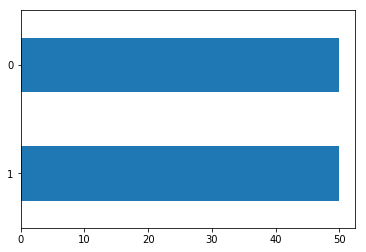

In [197]:
labels = data[4]
labels.value_counts().plot(kind = "barh")

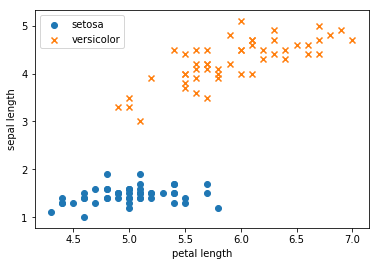

In [245]:
plt.scatter(np.array(data[:50][0]), np.array(data[:50][2]), marker ='o', label = 'setosa')
plt.scatter(np.array(data[50:][0]), np.array(data[50:][2]), marker = 'x', label = 'versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [201]:
def activation_function(input_value, decision_boundary):
    if input_value >= decision_boundary:
        return 1
    else:
        return 0

In [217]:
def perceptron(data, iteration_num, lr=10e-2):
    data = np.asmatrix(data, dtype='float64')
    features = data[:, :-1]
    labels = data[:, -1]
    #initialize Weights
    w = np.ones(shape = (1, features.shape[1]), dtype = 'float64')
    bias = 0
    global targets
    for epoch in range(iteration_num):
        targets = []
        for i,row in enumerate(features):
            y_hat = activation_function(np.dot(w, row.transpose()) + bias, 0)
            targets.append(y_hat)
            w += (lr * (labels[i]-y_hat) * row)
    return targets

In [218]:
predictions = perceptron(data,1)
accuracy = sum(np.array(labels)==np.array(predictions))/len(data[4])
print(accuracy)

0.97


##### Breast Cancer Dataset

In [222]:
import sklearn.datasets

In [229]:
breast_cancer = sklearn.datasets.load_breast_cancer()
cancer_data = breast_cancer.data
cancer_df = pd.DataFrame(cancer_data, columns=breast_cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [230]:
cancer_df['class'] = breast_cancer.target

In [231]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### Data is Ambulance

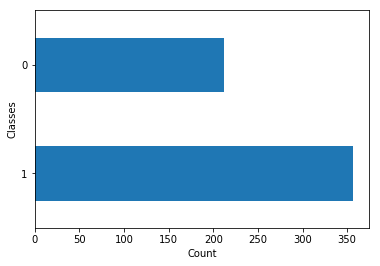

In [234]:
cancer_df['class'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()

In [235]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#perform Normalizing on the data.
X = cancer_df.drop("class", axis = 1)
Y = cancer_df["class"]
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [236]:
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=cancer_df.drop("class",axis = 1).columns)

In [237]:
#train test split.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)

In [238]:
np.asmatrix(X_train)

matrix([[0.37479294, 0.43354751, 0.40294382, ..., 0.85051546, 0.25645575,
         0.39656303],
        [0.23990724, 0.16638485, 0.23668026, ..., 0.22501718, 0.23299823,
         0.18345796],
        [0.29007525, 0.19783564, 0.30004837, ..., 0.68247423, 0.31184703,
         0.56054047],
        ...,
        [0.26499124, 0.29387893, 0.24904982, ..., 0.03014433, 0.1852947 ,
         0.06080283],
        [0.30806001, 0.42576936, 0.29797526, ..., 0.44054983, 0.25744136,
         0.09268005],
        [0.57783142, 0.21068651, 0.57017483, ..., 0.61065292, 0.17307313,
         0.04899646]])

In [239]:
train_iter = list(range(1, 30))
accuracy = []
for i in train_iter:
    predictions = perceptron(np.asmatrix(cancer_df), i)
    accuracy.append(sum(predictions==cancer_df['class']) / len(cancer_df['class']))


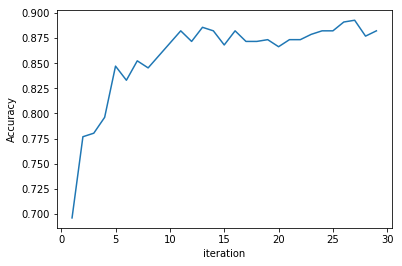

0.8822495606326889

In [241]:
plt.plot(train_iter, accuracy)
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.show()
accuracy[-1]